In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
%matplotlib inline

In [2]:
'''Load data'''
DATA_PATH = os.path.join('data', 'bach_air.wav')
sample_rate, data = wavfile.read(DATA_PATH, mmap=False)

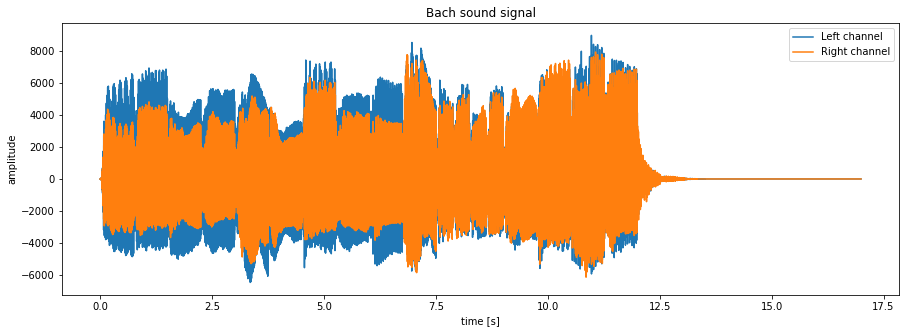

In [3]:
'''Inspect signal'''
time = np.linspace(0, data.shape[0]/sample_rate, data.shape[0])

plt.figure(figsize=(15,5))
plt.title('Bach sound signal')
plt.plot(time, data[:, 0], label='Left channel')
plt.plot(time, data[:, 1], label='Right channel')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.show()

In [4]:
#https://dl.acm.org/doi/pdf/10.1109/TASLP.2016.2634118

# Matlab code translation

In [89]:
# Create window length from forgetting factor
def get_window_length(forgetting_factor):
    return np.log(0.01) // np.log(forgetting_factor)

# Create new candidate A matrix
def get_new_candidates(time_vector, vector_length, frequency_matrix, sampling_frequency):
    candidates_exponent = np.transpose(
        time_vector.reshape(vector_length, 1) * frequency_matrix.ravel()*2*np.pi/sampling_frequency)
    candidates_exponent_no_phase = candidates_exponent
    candidates = np.exp(1j*candidates_exponent)
    return candidates_exponent, candidates_exponent_no_phase, candidates

def PEARLS(
    signal, 
    forgetting_factor, 
    smoothness_factor, 
    max_num_harmonics, 
    sampling_frequency, 
    minimum_pitch, 
    maximum_pitch, 
    init_freq_resolution
):
    var = None
    signal_length = len(signal)
    
    ##### ADDITIONAL CONSTANTS #####
    # Number of samples for dictionary update
    num_samples_pitch = np.floor(45*1e-3*sampling_frequency)
    
    # Length of dictionary
    history_len = 200
    
    # Penalty parameters
    penalty_factor_1 = 4
    penalty_factor_2 = 80
    
    # Gradient step-size
    step_size = 1e-4
    max_gradient_iterations = 20
    
    ##### INITIALIZE CANDIDATES #####
    # Initialize frequency candidates
    pitch_candidates = np.arange(
        minimum_pitch, maximum_pitch, init_freq_resolution
    )
    num_pitch_candidates = len(pitch_candidates) # Maybe call it num_pitches???
    num_filter_coeffs = num_pitch_candidates * max_num_harmonics

    # Define the frequency matrix
    frequency_matrix = np.arange(1, max_num_harmonics+1) * pitch_candidates.reshape((num_pitch_candidates, 1))
    
    # Define time indexes
    time = np.arange(signal_length)

    # Define history indicies
    time_history = np.arange(history_len)
    
    # Define 45 ms candidates
    (
        candidates_exponent, 
        candidates_exponent_no_phase, 
        candidates
    ) = get_new_candidates(time_history, history_len, frequency_matrix, sampling_frequency)
    
    ##### DEFINE PENALTY WINDOW #####
    # Define the window length
    window_length = get_window_length(forgetting_factor)

    ##### INITIALIZE VARIABLES #####
    # Get first candidate vector
    candidate = candidates[:, 0]
    candidate = candidate.reshape(len(candidate), 1)
    
    # Initial estimate of covariance matrix (R(t))
    cov_matrix_est = candidate*candidate.conj().T
    
    var = cov_matrix_est
    # Initial value of candidate value vector (r(t))
    cov_vector = signal[0]*np.conj(candidate)
    
    # Initialize filter weights
    filter_estimate = np.zeros((num_filter_coeffs, 1)) # Better variable name?
    rls_filter = np.zeros((num_filter_coeffs, 1))
    rls_filter_history = np.zeros((num_filter_coeffs, signal_length))
    
    # Pitch history
    pitch_history = np.zeros((num_pitch_candidates, signal_length))
    
    ##### PERFORM ALGORITHM #####
        
    for iter_idx, signal_value in enumerate(signal):
        # Store current estimates
        pitch_history[:, iter_idx] = pitch_candidates

        ##### SAMPLE SELECTION #####
        history_idx = iter_idx % history_len
        
        candidate = candidates[: ,0]
        candidate = candidate.reshape(len(candidate), 1)

        # Renew candidate matrix if history is filled
        if history_idx == 0:
            prev_candidates = candidates
            upper_time_idx = min(signal_length, iter_idx + history_len)
            time_history = time[iter_idx:upper_time_idx]
            # If last "batch"
            if upper_time_idx - history_idx < history_len:
                time_history = np.append(
                    time_history, 
                    np.zeros(history_len - (upper_time_idx - smaple_idx))
                )
            (
                candidates_exponent, 
                candidates_exponent_no_phase, 
                candidates
            ) = get_new_candidates(time_history, history_len, frequency_matrix, sampling_frequency)
            
        
        sample = signal[iter_idx]

        # Update covariance estimate
        cov_matrix_est = forgetting_factor * cov_matrix_est + candidate * np.transpose(candidate)
        cov_vector = forgetting_factor * cov_vector + candidate * sample

        # SKIP UPDATING PENALTY PARAMETERS...

        # SKIP DO ACTIVE UPDATE

        # DO THE GOOD STUFF :D
        # TODO: Continue with alg!





    
    #var = candidate, candidates
    
    # To return something...
    filter_history = []
    candidate_frequency_history = []
    return filter_history, candidate_frequency_history, var

In [90]:
"""Test code"""
N = 1000
signal = data[10000:10000+N, 0]
forgetting_factor = 0.995
smoothness_factor = 1e4
max_num_harmonics = 5
sampling_frequency = sample_rate
minimum_pitch = 50
maximum_pitch = 500
initial_frequency_resolution = 5

filter_history, candidate_frequency_history, var = PEARLS(
    signal, 
    forgetting_factor, 
    smoothness_factor, 
    max_num_harmonics,
    sampling_frequency,
    minimum_pitch,
    maximum_pitch,
    initial_frequency_resolution
)

In [87]:
var.shape

(450, 450)

In [81]:
(candidate * np.transpose(candidate)).shape

(450, 450)

In [38]:
lv2

NameError: name 'lv2' is not defined